# Text Similarity between Concepts Extracted from Source Codes and Documentation

## Concept Extraction (Source Codes and Documentation)

In [1]:
from extract import run_extract
import pandas as pd
import logging

logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
df_readme, df_code = run_extract('repo')

[1/50] Extracting android-gpuimage...
[2/50] Extracting ansj_seg...
[3/50] Extracting arrow...
[4/50] Extracting atmosphere...
[5/50] Extracting autorest-clientruntime-for-java...
[6/50] Extracting blurkit-android...
[7/50] Extracting bytecode-viewer...
[8/50] Extracting cglib...
[9/50] Extracting dagger...
[10/50] Extracting ExpectAnim...
[11/50] Extracting graal...
[12/50] Extracting graphql-java...
[13/50] Extracting halo...
[14/50] Extracting HikariCP...
[15/50] Extracting http-request...
[16/50] Extracting interviews...
[17/50] Extracting java-learning...
[18/50] Extracting Java-WebSocket...
[19/50] Extracting jeecg-boot...
[20/50] Extracting jeesite...
[21/50] Extracting JFoenix...
[22/50] Extracting jna...
[23/50] Extracting joda-time...
[24/50] Extracting jodd...
[25/50] Extracting JsonPath...
[26/50] Extracting junit4...
[27/50] Extracting librec...
[28/50] Extracting light-task-scheduler...
[29/50] Extracting mal...
[30/50] Extracting mall...
[31/50] Extracting mosby...
[32/5

In [3]:
print('Number of Code Concepts: {}'.format(df_code.shape[0]))
print('Number of README Concepts: {}'.format(df_readme.shape[0]))

Number of Code Concepts: 50
Number of README Concepts: 50


### Source Codes

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', 100):
    df_code = df_code.style.set_properties(**{'text-align': 'left'})

    display(df_code)

,Repo,Code Extraction Status
0,android-gpuimage,Code extracted at output/android-gpuimage/android-gpuimage_code.txt
1,ansj_seg,Code extracted at output/ansj_seg/ansj_seg_code.txt
2,arrow,Code extracted at output/arrow/arrow_code.txt
3,atmosphere,Code extracted at output/atmosphere/atmosphere_code.txt
4,autorest-clientruntime-for-java,Code extracted at output/autorest-clientruntime-for-java/autorest-clientruntime-for-java_code.txt
5,blurkit-android,Code extracted at output/blurkit-android/blurkit-android_code.txt
6,bytecode-viewer,Code extracted at output/bytecode-viewer/bytecode-viewer_code.txt
7,cglib,Code extracted at output/cglib/cglib_code.txt
8,dagger,Code extracted at output/dagger/dagger_code.txt
9,ExpectAnim,Code extracted at output/ExpectAnim/ExpectAnim_code.txt


### Documentation

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', 100):
    df_readme = df_readme.style.set_properties(**{'text-align': 'left'})

    display(df_readme)

,Repo,Doc Extraction Status
0,android-gpuimage,Doc extracted at output/android-gpuimage/android-gpuimage_doc.txt
1,ansj_seg,Doc extracted at output/ansj_seg/ansj_seg_doc.txt
2,arrow,Doc extracted at output/arrow/arrow_doc.txt
3,atmosphere,Doc extracted at output/atmosphere/atmosphere_doc.txt
4,autorest-clientruntime-for-java,Doc extracted at output/autorest-clientruntime-for-java/autorest-clientruntime-for-java_doc.txt
5,blurkit-android,Doc extracted at output/blurkit-android/blurkit-android_doc.txt
6,bytecode-viewer,Doc extracted at output/bytecode-viewer/bytecode-viewer_doc.txt
7,cglib,Doc extracted at output/cglib/cglib_doc.txt
8,dagger,Doc extracted at output/dagger/dagger_doc.txt
9,ExpectAnim,Doc extracted at output/ExpectAnim/ExpectAnim_doc.txt


## Data Ingestion

In [6]:
import pandas as pd
import logging

logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [7]:
def pull_text(text_files):
    res=[]
    for tf in text_files:
        with open(tf, 'r', encoding='utf-8') as myfile:
            res.append(myfile.read())
    return res[0], res[1]

In [8]:
import glob
import os

root = 'output'
code_lst = []
doc_lst = []
new_dir_lst = []

# fetch all the folders
dirlist = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]

### Only use this to take out the non-English

# dirlist.remove('ansj_seg')
# dirlist.remove('halo')
# dirlist.remove('java-learning')
# dirlist.remove('jeecg-boot')
# dirlist.remove('jeesite')
# dirlist.remove('mall')
# dirlist.remove('tcc-transaction')
# dirlist.remove('weixin-java-tools')

for dir in dirlist:
    # fetch all text filenames from folder
    text_files = [f for f in glob.glob(root + '\\' + dir + '\\' + '**/*.txt', recursive=True)]
    
    # open the file and save as text
    # only consider those with both files to compare
    if len(text_files) is 2:
        t_code, t_doc = pull_text(text_files)
        code_lst.append(t_code)
        doc_lst.append(t_doc)
        new_dir_lst.append(dir)

In [9]:
df_data = pd.DataFrame(list(zip(code_lst,doc_lst)), columns=['Code Extracted','Doc Extracted'])
df_data.insert(0,'Repo',new_dir_lst)

display(df_data)

,Repo,Code Extracted,Doc Extracted
0,android-gpuimage,texture view texture view tag texture simple l...,gpuimage android idea ios gpuimage framework g...
1,ansj_seg,ansj tokenizer tokenizer term attribute term a...,ansj httpdemonlpcnorg ngramcrfhmm java mac air...
2,arrow,avro arrow avro arrow vector iterator avro arr...,licensed apache software foundation asf one co...
3,atmosphere,asynchronous broadcast filter broadcast filter...,welcome atmosphere event drive framework suppo...
4,autorest-clientruntime-for-java,azure environment authentication endpoint toke...,autorest client runtimes java runtime library ...
5,blurkit-android,blur kit instrument test context context bitma...,blurkit blurkit extraordinarily easy use perfo...
6,bytecode-viewer,skeleton plugin execute array list node node l...,bytecode viewer bytecode viewer lightweight us...
7,cglib,bean copier key key factory type converter typ...,cglib byte code generation library high level ...
8,dagger,test app runnable doit test app runnable doit ...,dagger fast dependency injector android java d...
9,ExpectAnim,expect anim alpha activity app compat activity...,expectanim describe animation run download mod...


## Text Similarity

Running similarity measurement on repositories with both code and documents extracted.

In [10]:
print('No. of repo to be measured: {}'.format(df_data.shape[0]))

No. of repo to be measured: 50


### Jaccard Similarity

In [11]:
# from venn import venn

def get_jaccard_sim(code, doc): 
    a = set(code.split()) 
    b = set(doc.split())
    c = a.intersection(b)
    
#     result = {
#         'No. of words in android-gpuimage Code Set': a,
#         'No. of words in android-gpuimage Documentation Set': b
#     }
    
#     venn(result)
    
    return float(len(c)) / (len(a) + len(b) - len(c))

In [12]:
result_lst = []
i = 0

while i < len(new_dir_lst):
    result = ( new_dir_lst[i], get_jaccard_sim(code_lst[i],doc_lst[i]) )
    result_lst.append(result)
    i+=1
    
df_res1 = pd.DataFrame(result_lst, columns=['Repo','Similarity'])
df_res1

,Repo,Similarity
0,android-gpuimage,0.221219
1,ansj_seg,0.011204
2,arrow,0.057765
3,atmosphere,0.054429
4,autorest-clientruntime-for-java,0.069069
5,blurkit-android,0.082840
6,bytecode-viewer,0.091278
7,cglib,0.030508
8,dagger,0.043988
9,ExpectAnim,0.107383


In [13]:
str(round(df_res1['Similarity'].mean()*100,2)) + '%'

'7.27%'

(0.0, 1.0)

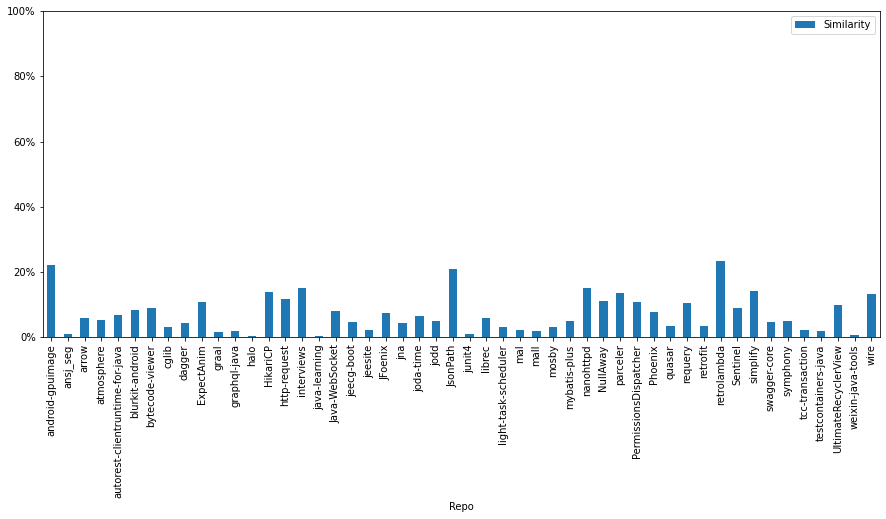

In [14]:
plt.rcParams['figure.figsize'] = (15, 6)

ax1 = df_res1.plot(kind='bar',
              x='Repo',
              y='Similarity')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.ylim(0, 1)

### Cosine Similarity with TfidfVectorizer

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

sm_lst = []
i = 0

while i < len(new_dir_lst):
    sm_lst.append(tfidf_vectorizer.fit_transform([code_lst[i], doc_lst[i]]))
    i+=1

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

def get_cos_sim(sm_code, sm_doc):
    return cosine_similarity(sm_code, sm_doc)

In [17]:
result_lst = []
i = 0

while i < len(new_dir_lst):
    result = ( new_dir_lst[i], get_cos_sim(sm_lst[i], sm_lst[i])[0][1] )
    result_lst.append(result)
    i+=1
    
df_res2 = pd.DataFrame(result_lst, columns=['Repo','Similarity'])
df_res2

,Repo,Similarity
0,android-gpuimage,0.257778
1,ansj_seg,0.060456
2,arrow,0.104310
3,atmosphere,0.286065
4,autorest-clientruntime-for-java,0.080435
5,blurkit-android,0.287271
6,bytecode-viewer,0.098831
7,cglib,0.084856
8,dagger,0.020527
9,ExpectAnim,0.160859


In [18]:
str(round(df_res2['Similarity'].mean()*100,2)) + '%'

'13.38%'

(0.0, 1.0)

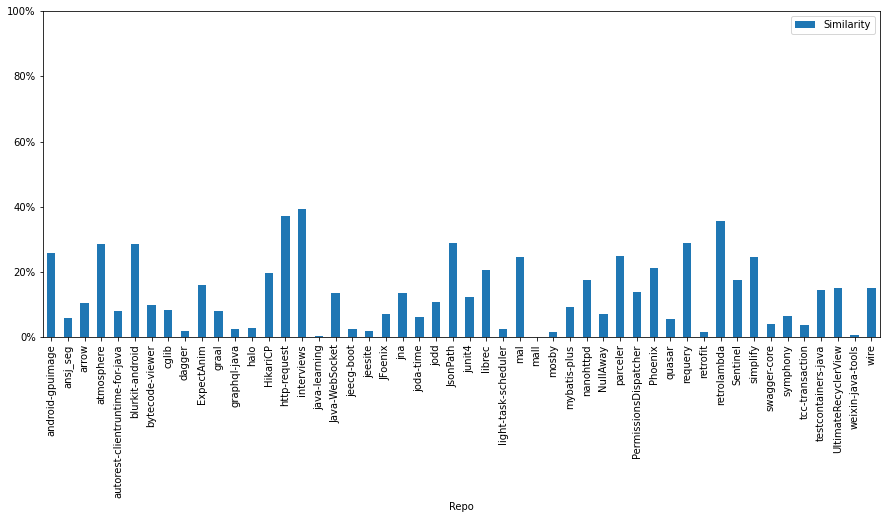

In [19]:
plt.rcParams['figure.figsize'] = (15, 6)

ax2 = df_res2.plot(kind='bar',
              x='Repo',
              y='Similarity')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.ylim(0, 1)

### Cosine Similarity with Averaged Word2Vec

In [20]:
from gensim.models.keyedvectors import KeyedVectors
from nltk import word_tokenize
so_w2v_model = KeyedVectors.load_word2vec_format('SO_vectors_200.bin', binary=True)

In [21]:
import numpy as np
from scipy import spatial

index2word_set = set(so_w2v_model.index2word)

def avg_feature_vector(sentence, model=so_w2v_model, num_features=200, index2word_set=index2word_set):
    words = sentence.split()
    feature_vec = np.zeros((num_features, ), dtype='float32')
    n_words = 0
    for word in words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [22]:
result_lst = []
i = 0

while i < len(new_dir_lst):
    code_vector = avg_feature_vector(code_lst[i])
    doc_vector = avg_feature_vector(doc_lst[i])
    result = ( new_dir_lst[i], 1 - spatial.distance.cosine(code_vector, doc_vector) )
    result_lst.append(result)
    i+=1
    
df_res3 = pd.DataFrame(result_lst, columns=['Repo','Similarity'])
df_res3

,Repo,Similarity
0,android-gpuimage,0.843645
1,ansj_seg,0.197719
2,arrow,0.541452
3,atmosphere,0.682503
4,autorest-clientruntime-for-java,0.702137
5,blurkit-android,0.841082
6,bytecode-viewer,0.692215
7,cglib,0.701807
8,dagger,0.533240
9,ExpectAnim,0.762114


In [23]:
str(round(df_res3['Similarity'].mean()*100,2)) + '%'

'60.58%'

(0.0, 1.0)

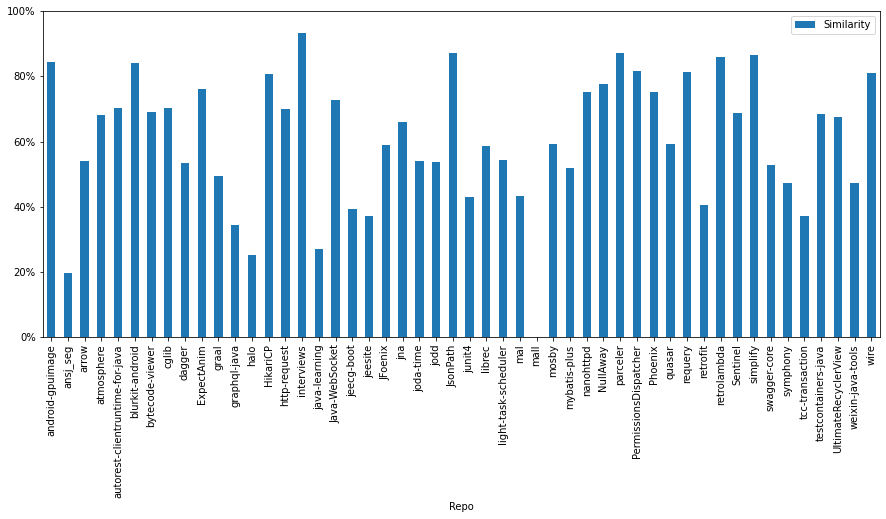

In [24]:
plt.rcParams['figure.figsize'] = (15, 6)

ax3 = df_res3.plot(kind='bar',
              x='Repo',
              y='Similarity')
ax3.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.ylim(0, 1)

### Cosine Similarity with SpaCy

In [25]:
import spacy
nlp = spacy.load('en_core_web_md')
nlp.max_length = 4000000

def get_spacycos_sim(code, doc):
    doc1 = nlp(code)
    doc2 = nlp(doc)
    return doc1.similarity(doc2)

In [26]:
result_lst = []
i = 0

while i < len(new_dir_lst):
    result = ( new_dir_lst[i], get_spacycos_sim(code_lst[i],doc_lst[i]) )
    result_lst.append(result)
    i+=1
    
df_res4 = pd.DataFrame(result_lst, columns=['Repo','Similarity'])
df_res4

,Repo,Similarity
0,android-gpuimage,0.915910
1,ansj_seg,0.569241
2,arrow,0.871781
3,atmosphere,0.905642
4,autorest-clientruntime-for-java,0.919314
5,blurkit-android,0.895745
6,bytecode-viewer,0.901452
7,cglib,0.912086
8,dagger,0.834801
9,ExpectAnim,0.821814


In [27]:
str(round(df_res4['Similarity'].mean()*100,2)) + '%'

'84.09%'

(0.0, 1.0)

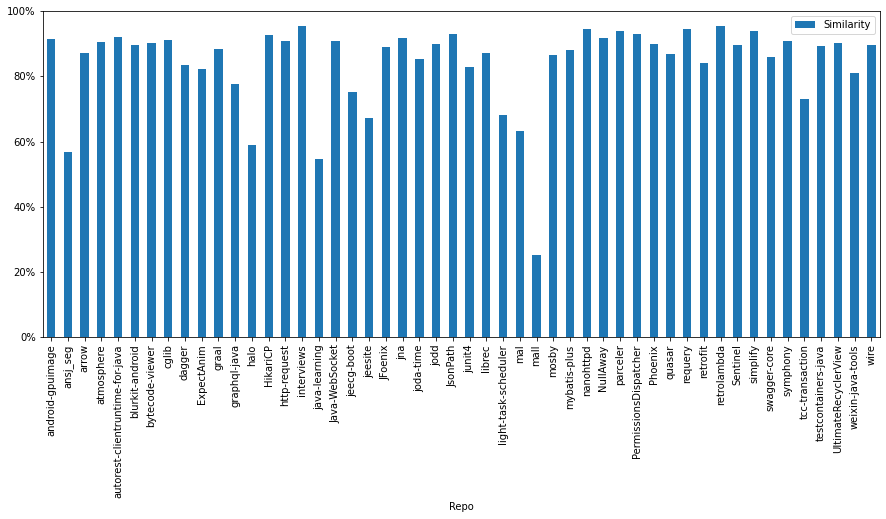

In [28]:
plt.rcParams['figure.figsize'] = (15, 6)

ax4 = df_res4.plot(kind='bar',
              x='Repo',
              y='Similarity')
ax4.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.ylim(0, 1)

### Cosine Similarity with FastText (Gensim Wrapper)

In [29]:
from gensim.models.wrappers import FastText

model = FastText.load_fasttext_format('wiki.en')

In [30]:
def get_ft_sim(code, doc):
    res = model.similarity(code, doc)
    return res

In [31]:
result_lst = []
i = 0

while i < len(new_dir_lst):
    result = ( new_dir_lst[i], get_ft_sim(code_lst[i],doc_lst[i]) )
    result_lst.append(result)
    i+=1
    
df_res5 = pd.DataFrame(result_lst, columns=['Repo','Similarity'])
df_res5

,Repo,Similarity
0,android-gpuimage,0.965565
1,ansj_seg,0.878307
2,arrow,0.944222
3,atmosphere,0.968625
4,autorest-clientruntime-for-java,0.968495
5,blurkit-android,0.968984
6,bytecode-viewer,0.966910
7,cglib,0.915906
8,dagger,0.927805
9,ExpectAnim,0.911753


In [32]:
str(round(df_res5['Similarity'].mean()*100,2)) + '%'

'94.21%'

(0.0, 1.0)

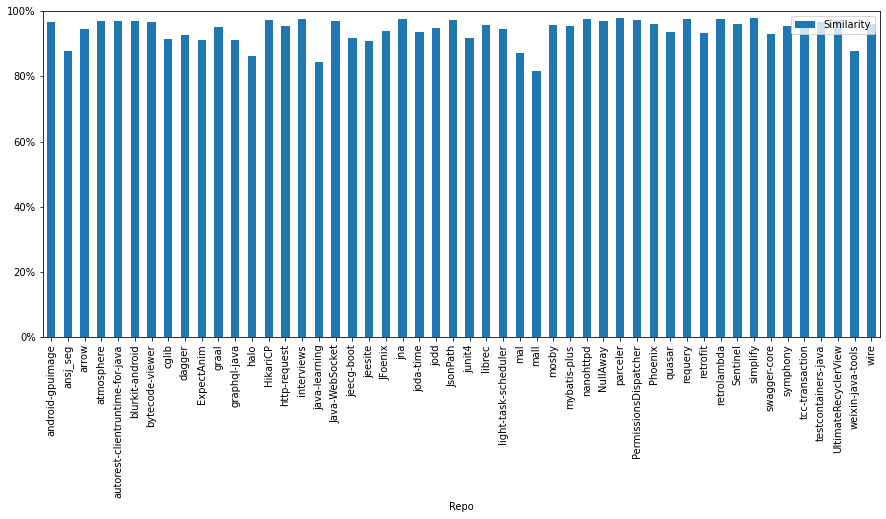

In [33]:
plt.rcParams['figure.figsize'] = (15, 6)

ax5 = df_res5.plot(kind='bar',
              x='Repo',
              y='Similarity')
ax5.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.ylim(0, 1)